In [1]:
function get_site_coordinate(site, vv_lattice, vv_basis)
    return vv_lattice[1] * site[1] + vv_lattice[2] * site[2] + vv_basis[site[3]]
end

get_site_coordinate (generic function with 1 method)

In [2]:
function get_sites(LL, vv_lattice, vv_basis)
    coordinates = []; 
    sites = []; 
    site_coord=Dict{}()
    site_number=Dict{}()
    i_site=0
    for i2 in 0:LL[2]-1
       for i1 in 0:LL[1]-1
            for (i_basis, v_basis) in enumerate(vv_basis)
                site = [i1,i2,i_basis]
                sites = push!(sites, site)
                v_site = get_site_coordinate(site, vv_lattice, vv_basis)
                coordinates = push!(coordinates, v_site)
                site_coord[site]=v_site
                i_site+=1
                site_number[site]=i_site
            end
        end
    end
    
    return coordinates, sites, site_coord, site_number
end

get_sites (generic function with 1 method)

In [245]:
function wrap_twist(site, neighbor, LL)
    i_neighbor  = site[1:2] + neighbor[1:2]
    wrap = zeros(2)
    for idir in 1:length(LL)
        if i_neighbor[idir]==-1
            wrap[idir] = -1
        elseif i_neighbor[idir]==LL[idir]
            wrap[idir] = +1
        else 
            wrap[idir] = 0
        end
    end
    return wrap
end

wrap_twist (generic function with 1 method)

In [272]:
function get_neighbor_site(site, neighbor, LL, pbc=:true)
    i_neighbor  = site[1:2] + neighbor[1:2]
    #if !pbc && 
    #    (i_neighbor[1]==-1 || i_neighbor[1]==LL[1] || i_neighbor[2]==-1 || i_neighbor[2]==LL[2])
    if !pbc && wrap_twist(site, neighbor, LL)!=[0,0]
        #error("no such neighbor with obc in get_neighbor_site")
        return nothing
    end 
    i_neighbor1 = mod(i_neighbor[1],LL[1])
    i_neighbor2 = mod(i_neighbor[2],LL[2])
    neighbor_site = [i_neighbor1, i_neighbor2, neighbor[3]] 
    return neighbor_site
end

get_neighbor_site (generic function with 2 methods)

In [273]:
function get_neighbors(site,neighbors,LL,pbc=true)
    neighbor_sites=[]
    for neighbor in neighbors
        neighbor_site = get_neighbor_site(site, neighbor, LL, pbc)
        if (neighbor_site!=nothing) push!(neighbor_sites,neighbor_site) end
    end
    return neighbor_sites
end

get_neighbors (generic function with 2 methods)

In [274]:
function get_all_neighbors(sites,neighbors_list,LL,nb,pbc=true)
    site_neighbors=Dict{}()
    for site in sites
        i_site = site_number[site]
        neighbor_sites = get_neighbors(site,neighbors_list[(i_site-1)%nb+1],LL,pbc) 
        site_neighbors[site]=neighbor_sites
    end
    return site_neighbors
end

get_all_neighbors (generic function with 2 methods)

In [275]:
using Plots
function plot_points(coords)
    coords_x = [coord[1] for coord in coords]
    coords_y = [coord[2] for coord in coords]
    p = scatter(coords_x, coords_y, 
        series_annotations = text.(1:length(coords), :bottom), 
        aspect_ratio=:equal,
        grid=:true, legend = false)
    return p
end

plot_points (generic function with 1 method)

# Square lattice

In [276]:
LL = [3, 3]
vv_lattice = [ [1., 0], [0, 1.] ]
b1=[0, 0]
vv_basis = [b1];

In [277]:
coordinates, sites, site_coord, site_number = get_sites(LL, vv_lattice, vv_basis);

In [278]:
coordinates[1:2]

2-element Vector{Any}:
 [0.0, 0.0]
 [1.0, 0.0]

In [279]:
sites[1]

3-element Vector{Int64}:
 0
 0
 1

In [280]:
site_coord[sites[2]]

2-element Vector{Float64}:
 1.0
 0.0

In [281]:
site_number[sites[4]]

4

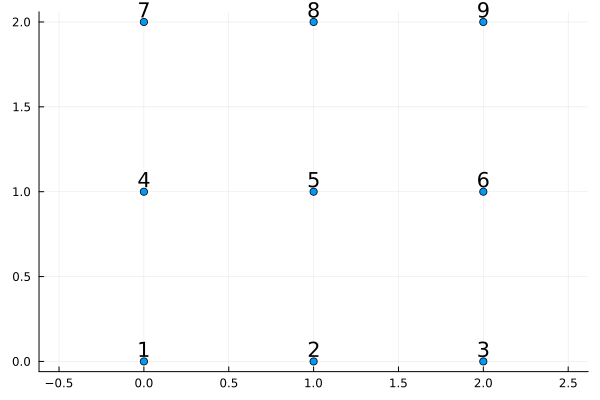

In [282]:
plot_points(coordinates)

In [283]:
neighbor = [-1, 0, 1]

3-element Vector{Int64}:
 -1
  0
  1

In [284]:
pbc=true
neighbor_site = get_neighbor_site(sites[1], neighbor, LL, pbc)

3-element Vector{Int64}:
 2
 0
 1

In [285]:
(neighbor_site!=nothing) ? 
        println(site_number[neighbor_site], ' ', site_coord[neighbor_site]) : 
        println("no such neighbor")

3 [2.0, 0.0]


In [286]:
wrap_twist(sites[9],neighbor,LL)

2-element Vector{Float64}:
 0.0
 0.0

In [287]:
neighbors = [ [1, 0, 1], [-1, 0, 1], [0, 1, 1], [0, -1, 1]  ];

In [288]:
neighbor_sites = get_neighbors(sites[9],neighbors,LL)

4-element Vector{Any}:
 [0, 2, 1]
 [1, 2, 1]
 [2, 0, 1]
 [2, 1, 1]

In [289]:
for neighbor_site in neighbor_sites
    println(site_number[neighbor_site], site_coord[neighbor_site])
end

7[0.0, 2.0]
8[1.0, 2.0]
3[2.0, 0.0]
6[2.0, 1.0]


In [290]:
length(vv_basis)

1

In [291]:
pbc=false
neighbors_list = [ neighbors ]
site_neigbors = get_all_neighbors(sites,neighbors_list,LL,length(vv_basis),pbc);

In [293]:
i_site=3
for neighbor_site in site_neigbors[sites[i_site]]
    println(site_number[neighbor_site])
end

2
6


# Hofstadter

In [389]:
function get_Hofstadter_hop(site,neighbor,site_coord,LL,param_dict)
    wraps=wrap_twist(site,neighbor,LL)
    if abs(neighbor[2])==1
        hop = param_dict[t]
    elseif neighbor[1]==1
        hop = param_dict[t]*exp(1im*2*pi*param_dict[ϕ]*site_coord[site][2])
    elseif neighbor[1]==-1
        hop = param_dict[t]*exp(-1im*2*pi*param_dict[ϕ]*site_coord[site][2])
    end
    return hop*exp(1im*param_dict[θθ][1]*wraps[1])*exp(1im*param_dict[θθ][2]*wraps[2])
end

get_Hofstadter_hop (generic function with 3 methods)

In [390]:
t=-1
ϕ=1/3
θθ = [1*pi/4, 1*pi/5]
param_dict=Dict{}()
param_dict[t]=t
param_dict[ϕ]=ϕ
param_dict[θθ]=θθ
i_site=1
neighbor=[0,1,1]
get_Hofstadter_hop(sites[i_site],neighbor,site_coord,LL,param_dict)

-1.0 - 0.0im

In [391]:
param_dict[ϕ]

0.3333333333333333

In [392]:
function get_Hofstadter_hamiltonian(sites,neighbors_list,
                                    site_number,site_coord,
                                    nb,LL,param_dict,pbc)
    dimH = LL[1]*LL[2]
    HH = zeros(ComplexF64,dimH,dimH)
    #HH = zeros(dimH,dimH)
    for site in sites        
        i_site = site_number[site]
        #println(nb, (i_site-1)%nb+1)
        neighbors = neighbors_list[(i_site-1)%nb+1]
        #println(i_site,neighbors)
        for neighbor in neighbors
            hop = get_Hofstadter_hop(site,neighbor,site_coord,LL,param_dict)
            #println(hop)
            neighbor_site = get_neighbor_site(site, neighbor, LL, pbc)
            if (neighbor_site!=nothing) 
                i_neighbor = site_number[neighbor_site]
                HH[i_neighbor,i_site] = hop
            end
        end
    end
    return HH
end

get_Hofstadter_hamiltonian (generic function with 1 method)

In [393]:
pbc=true
HH = get_Hofstadter_hamiltonian(sites,neighbors_list,
                                site_number,site_coord,
                                length(vv_basis),LL,param_dict,pbc);

In [394]:
using LinearAlgebra

In [395]:
eigen(HH)

Eigen{ComplexF64, Float64, Matrix{ComplexF64}, Vector{Float64}}
values:
9-element Vector{Float64}:
 -2.671174618201539
 -2.671174618201539
 -2.671174618201538
  0.5302180650227071
  0.5302180650227075
  0.5302180650227075
  2.1409565531788375
  2.1409565531788375
  2.1409565531788384
vectors:
9×9 Matrix{ComplexF64}:
  -0.330546-0.0470747im  …    0.208617+0.0800806im
   -0.53669-0.0904935im     -0.0233578+0.222235im
  -0.282697-0.0538999im      -0.163588-0.281206im
 -0.0792849+0.250748im       -0.158009-0.158009im
  -0.484233-0.0333134im      -0.223459-4.94396e-17im
  0.0485744-0.253927im   …   -0.297634+0.131346im
  -0.113305+0.023004im       -0.235553+0.268593im
  -0.335074+0.110647im       0.0233632-0.356485im
        0.0+0.0im              0.57735+0.0im

In [351]:
eigen(HH)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
9-element Vector{ComplexF64}:
 -0.4273869065447693 - 2.6984147285493134im
 -0.4273869065447675 - 2.69841472854931im
 -0.4273869065447675 - 2.6984147285493085im
  0.1145179764643058 + 0.723038047359035im
 0.11451797646430616 + 0.7230380473590347im
 0.11451797646430667 + 0.7230380473590355im
  0.3128689300804615 + 1.975376681190274im
  0.3128689300804618 + 1.975376681190276im
  0.3128689300804619 + 1.975376681190276im
vectors:
9×9 Matrix{ComplexF64}:
   0.57735+0.0im          -0.00415862-0.0272945im   …  0.0207041+0.0302495im
  0.394338+1.94289e-16im      0.34176-0.0416982im       0.295329-0.260624im
  0.394338+2.77556e-17im   -0.0824899-0.00829597im     -0.316033+0.230375im
  0.394338+2.22045e-16im    -0.152017-0.224413im       0.0973706-0.1557im
 0.0528312+0.0915064im       0.519676+0.0im             0.159569+0.26343im
 0.0528312-0.0915064im      -0.274282+0.196123im    …   0.491447+0.0im
  0.394338+2.22045e-

# Kagome lattice

In [164]:
# Kagome 
LL = [3, 3]
vv_lattice = [ [2, 0], [1, sqrt(3)] ]
b1=[0, 0]; b2=vv_lattice[1]/2; b3=vv_lattice[2]/2
vv_basis = [b1,b2,b3];

In [30]:
coordinates, sites, site_coord, site_number = get_sites(LL, vv_lattice, vv_basis);

In [31]:
coordinates[1:2]

2-element Vector{Any}:
 [0.0, 0.0]
 [1.0, 0.0]

In [32]:
sites[1:2]

2-element Vector{Any}:
 [0, 0, 1]
 [0, 0, 2]

In [33]:
site_coord[sites[4]]

2-element Vector{Float64}:
 2.0
 0.0

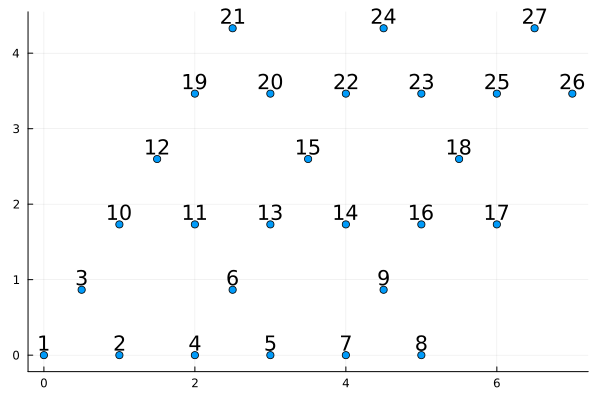

In [34]:
plot_points(coordinates)

In [35]:
neighbor = [0, -1, 3]

3-element Vector{Int64}:
  0
 -1
  3

In [36]:
neighbor_site = get_neighbor_site(sites[1], neighbor, LL,true)

3-element Vector{Int64}:
 0
 2
 3

In [37]:
site_number[neighbor_site], site_coord[neighbor_site]

(21, [2.5, 4.330127018922193])

In [38]:
neighbors_list = [
                 [ [0, 0, 2], [0, 0, 3], [-1, 0, 2], [ 0, -1, 3]  ],
                 [ [0, 0, 1], [0, 0, 3], [ 1, 0, 1], [ 1, -1, 3]  ],
                 [ [0, 0, 1], [0, 0, 2], [ 0, 1, 1], [-1,  1, 2]  ]
                 ]

3-element Vector{Vector{Vector{Int64}}}:
 [[0, 0, 2], [0, 0, 3], [-1, 0, 2], [0, -1, 3]]
 [[0, 0, 1], [0, 0, 3], [1, 0, 1], [1, -1, 3]]
 [[0, 0, 1], [0, 0, 2], [0, 1, 1], [-1, 1, 2]]

In [39]:
i_site = 27
neighbor_sites = get_neighbors(sites[i_site],neighbors_list[(i_site-1)%length(vv_basis)+1],LL);

In [40]:
for neighbor_site in neighbor_sites
    println(site_number[neighbor_site], site_coord[neighbor_site])
end

25[6.0, 3.4641016151377544]
26[7.0, 3.4641016151377544]
7[4.0, 0.0]
5[3.0, 0.0]


In [41]:
pbc=false
site_neigbors = get_all_neighbors(sites,neighbors_list,LL,length(vv_basis),pbc);

In [42]:
i_site=27
for neighbor_site in site_neigbors[sites[i_site]]
    println(site_number[neighbor_site])
end

25
26
